# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot. The data can be found [here](https://drive.google.com/file/d/1tgx8nnEXLcqy1ds_99T_14-2B9TM-Gne/view?usp=sharing), please downloand and place them in your local data folder from which you can read them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
data = pd.read_csv('../data/liquor_store_sales.csv')
data.sample(3)
#paolo: I like this sample method

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
24180,2017,6,REPUBLIC NATIONAL DISTRIBUTING CO,331224,SIMI RSE - 750ML,WINE,0.0,0.0,3.0
206,2017,4,CASTLE BRANDS USA CORP,12223,JEFFERSON PRITCHARD CAB FINISH - 750ML,LIQUOR,0.0,2.0,0.0
33763,2017,8,LEGENDS LTD,22033,ERDINGER OCTOBERFEST 50L 1/2K,KEGS,0.0,0.0,1.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

<AxesSubplot:>

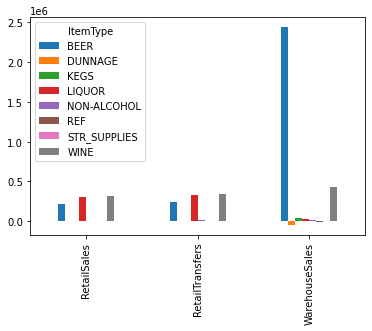

In [3]:
df = data[['RetailSales', 'RetailTransfers', 'WarehouseSales', 'ItemType']].groupby('ItemType').sum().T
df.plot.bar()
#paolo -ok nice plot, here though you should show only total
# sales retail ans transfers

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

<AxesSubplot:ylabel='Supplier'>

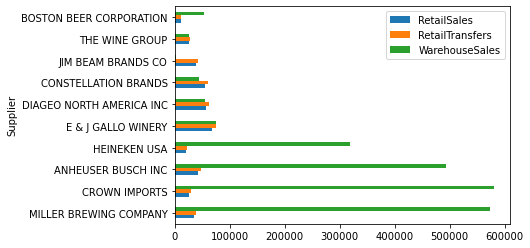

In [4]:
df2 = data[[ 'Supplier','RetailSales', 'RetailTransfers', 'WarehouseSales']].groupby('Supplier').agg('sum')
df2['Total'] = df2['RetailSales'] + df2['RetailTransfers'] + df2['WarehouseSales']
df3 = df2.sort_values('Total',  ascending = False).head(10)
df3[['RetailSales', 'RetailTransfers', 'WarehouseSales']].plot.barh()

In [ ]:
#paolo: nice one!

## 3. Create a bar-chart chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

<AxesSubplot:xlabel='Month'>

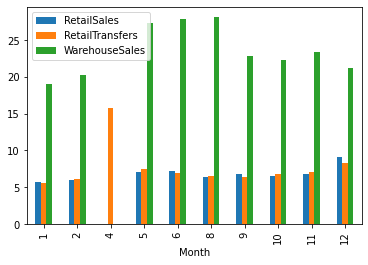

In [5]:
df4 = data[[ 'Month','RetailSales', 'RetailTransfers', 'WarehouseSales']].groupby(["Month"]).agg("mean")
df4.plot.bar()

## 4. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

<AxesSubplot:xlabel='Month'>

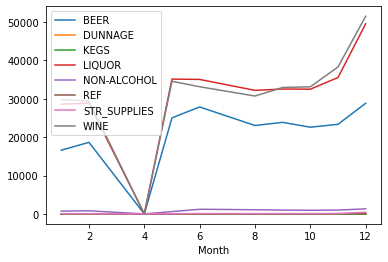

In [6]:
df5= data.pivot_table(values='RetailSales', index='Month', columns= 'ItemType', aggfunc='sum')
df5

sns.lineplot(data = df5, hue='ItemType', dashes=False)
#sns.lineplot(x = ['Year','Month'], y= 'RetailSales', data = df5, hue = 'ItemType')

## 6. Plot the same information as above (i.e. Q5) but as a bar chart.

<AxesSubplot:xlabel='ItemType'>

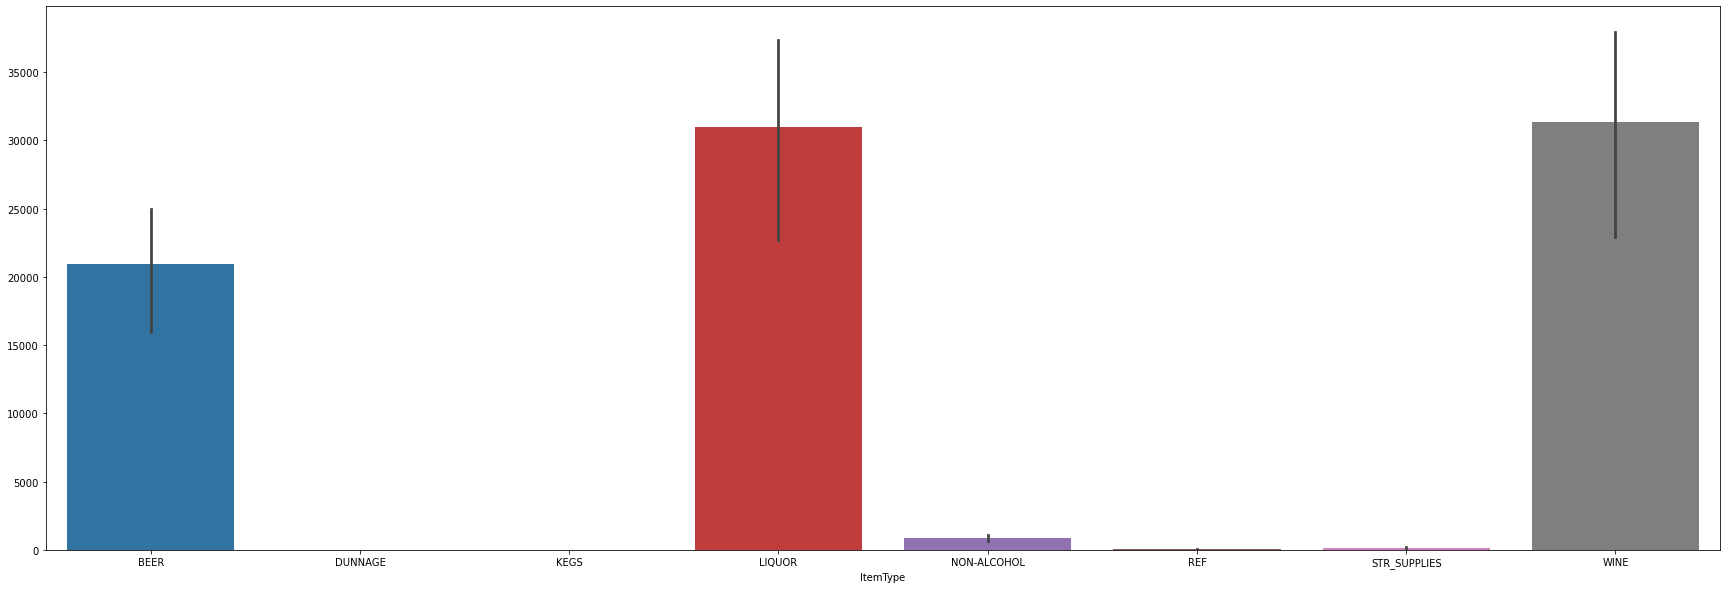

In [7]:
plt.figure(figsize=(30,10))

sns.barplot(data = df5)

#PS. It seems as though there's no question 5
#paolo: yes- you are right, I didn't realize it 
#paolo: nice plot- better to add also a legend

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

In [8]:
sns.scatterplot(x='RetailSales', y= 'RetailTransfers', hue= 'ItemType', data = data)
#paolo: error here but could be due to my version of sns.
# did you try lmplot?

<AxesSubplot:xlabel='RetailSales', ylabel='RetailTransfers'>

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 432x288 with 1 Axes>

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

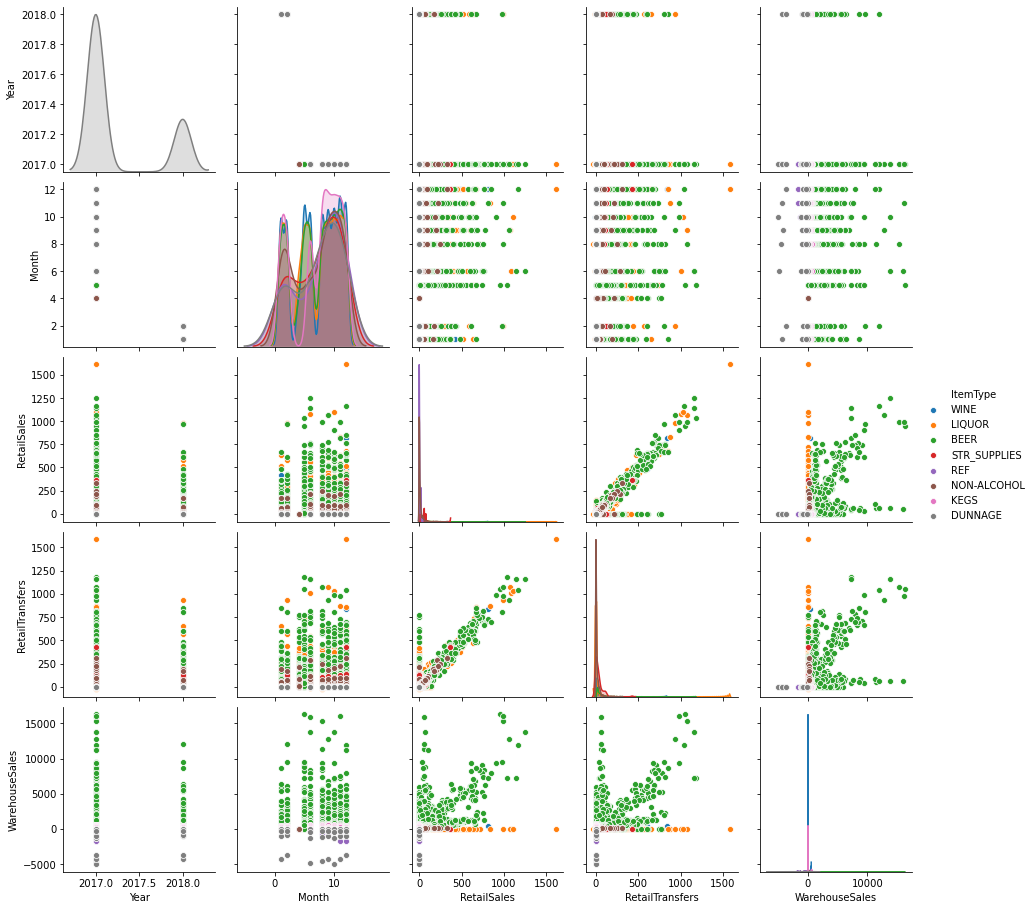

In [9]:
sns.pairplot(data = data, hue = 'ItemType')

In [ ]:
#paolo check yes!